In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

General Forecasting:

In [2]:
''' FORECAST VARIABLES '''

E1 = 'E1'
E2 = 'E2'
E3 = 'E3'
E4 = 'E4'
E5 = 'E5'
T = 'T'            # nb. relevant gyroscope axis = Y, relevant acc axes = X, Z
AX = 'AX'
AY = 'AY'
AZ = 'AZ'
GX = 'GX'
GY = 'GY'
GZ = 'GZ'

'''CONVERTING COLUMN TO ARRAY (only necessary for analysis)'''

def column_to_array(file_path, column):
    d = pd.read_csv(file_path, header=None, names=COLUMNS)
    c = column
    col = pd.DataFrame(d, columns = [column])
    col_array = np.array(col)
    big_array = np.concatenate(col_array)
    return big_array

''' FUNCTIONS '''

def sin_fun(x, a, b, c, d):
    '''
    Returns a sinusoidal function with parameters a, b, c, d
    '''
    return a*np.sin(b*x - c) + d

def plot_sin(data_array, time_array, initial_parameters):
    '''
    Returns a plot of the sinusoidal curve
    '''
    T = time_array                                              #list of times from CSV
    D = data_array                                              #list of corresponding angular velocities
    pars, cov = curve_fit(sin_fun, T, D, p0=initial_parameters) #optimised fit
    sin = sin_fun(T, *pars)
    return plt.plot(T, sin, linewidth=2, color='black', label='Calculated curve')

def plot_forecast(data_array, time_array, initial_parameters):
    '''
    Plots future accelerations against future times using expected sinusoidal form
    '''
    T = time_array                                              #list of times from CSV
    D = data_array                                              #list of corresponding angular velocities
    pars, cov = curve_fit(sin_fun, T, D, p0=initial_parameters) #optimised fit
    print(pars)
    tw = max(T)           #timing measurement window of existing data
    future_t = []                  #set of future times
    future_curve = []              #corresponding future y values
    for i in T:
        ft = i + tw                #shifts current times to future times by adding the length of the timing window
        future_t.append(ft)        #adds this future time to list
        fy = sin_fun(ft, *pars)   #predicted future y value
        future_curve.append(fy)    #adds this to list
    
    Tf = np.array(future_t)     #array of future times
    Af = np.array(future_curve) #array of predictions
    return plt.plot(Tf, Af, label='Predicted curve', color='orange')

def rms_error(data_array, time_array, initial_parameters): 
    '''
    Returns root mean square error on optimised curve
    '''
    T = time_array                                              #list of times from CSV
    D = data_array                                              #list of corresponding measurements
    n = len(D)
    pars, cov = curve_fit(sin_fun, T, D, p0=initial_parameters) #optimised fit
    bfl = sin_fun(T, *pars)     #best fit line
    res = D - bfl               #residuals for each point relative to best fit line
    se = np.sum(res**2)         #sum of squared residuals
    mse = se/n                  #mean squared residual
    rmse = np.sqrt(mse)         #root mean square residual
    return rmse

def target_points(target, error, data_array, time_array, initial_parameters):
    '''
    Plots a future curve and target points within an error range
    '''
    T = time_array                                              #list of times from CSV
    D = data_array                                              #list of corresponding angular velocities
    pars, cov = curve_fit(sin_fun, T, D, p0=initial_parameters) #optimised fit
    tw = max(T)           #timing measurement window of existing data
    future_t = []                  #set of future times
    future_curve = []              #corresponding future y values
    for i in T:
        ft = i + tw                #shifts current times to future times by adding the length of the timing window
        future_t.append(ft)        #adds this future time to list
        fy = sin_fun(ft, *pars)   #predicted future y value
        future_curve.append(fy)    #adds this to list
    
    Tf = np.array(future_t)     #array of future times
    Af = np.array(future_curve) #array of predictions

    key_points = []  #list of found target points
    key_times = []   #list of corresponding times
#     target_value = 3 #an example target point on y axis
#     error = 0.02 #error window (+/-)

    for k in Af:
        if target-error < k < target+error:
            key_points.append(k)      #if k is a target value, adds k to list
            j = future_curve.index(k) #finds position of found target value in list of y values
            t = future_t[j]           #identifies corresponding time
            key_times.append(t)       #adds to list of times

    kp = np.array(key_points) #convert lists of values to array
    kt = np.array(key_times)
    print('Target =', target, '+/-', error)
    return plt.scatter(kt, kp, label='Key points', color='red')

Gyroscope Data:

[1.83725458 2.41616148 0.52741176 1.50732106]
Target = 3 +/- 0.02


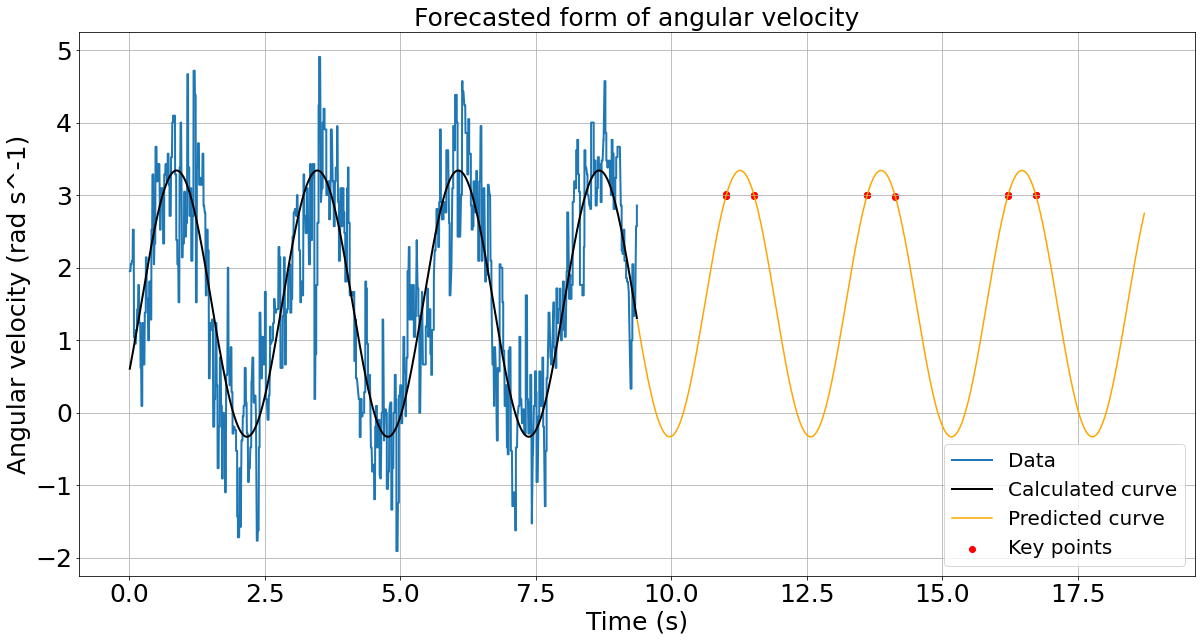

RMS error is 0.7768270369566606


In [3]:
''' TESTING FOR GYROSCOPE DATA '''

COLUMNS = [GY, T] # all column headings in data set

N = 2000  # size of measurement window

## INSERT RELEVANT FILE PATH OF CSV HERE: ##
file_path = r'C:\Users\Ellie\Desktop\third year\Group studies\gyro 4 min swing.csv'

p0=[3,2.25,0,1]  # approximate fitting parameters

Time = column_to_array(file_path, T)[:N]
A = column_to_array(file_path, GY)[:N]

# print(A, T)

target = 3
error = 0.02

plt.figure(figsize=(20,10))
plt.plot(Time, A, linewidth=2, label='Data')
plot_sin(A, Time, p0)
plot_forecast(A, Time, p0)
target_points(target, error, A, Time, p0)
plt.title('Forecasted form of angular velocity', fontsize = 25)
plt.xlabel('Time (s)', fontsize=25)
plt.ylabel('Angular velocity (rad s^-1)', fontsize=25)
plt.grid()
plt.legend(loc='lower right', fontsize=20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.show()

rms = rms_error(A, Time, p0)
print('RMS error is', rms)

Acceleration Data (AZ):

[ -3.07521718   4.87503811   0.68089569 -61.39289175]
Target = -58.5 +/- 0.04


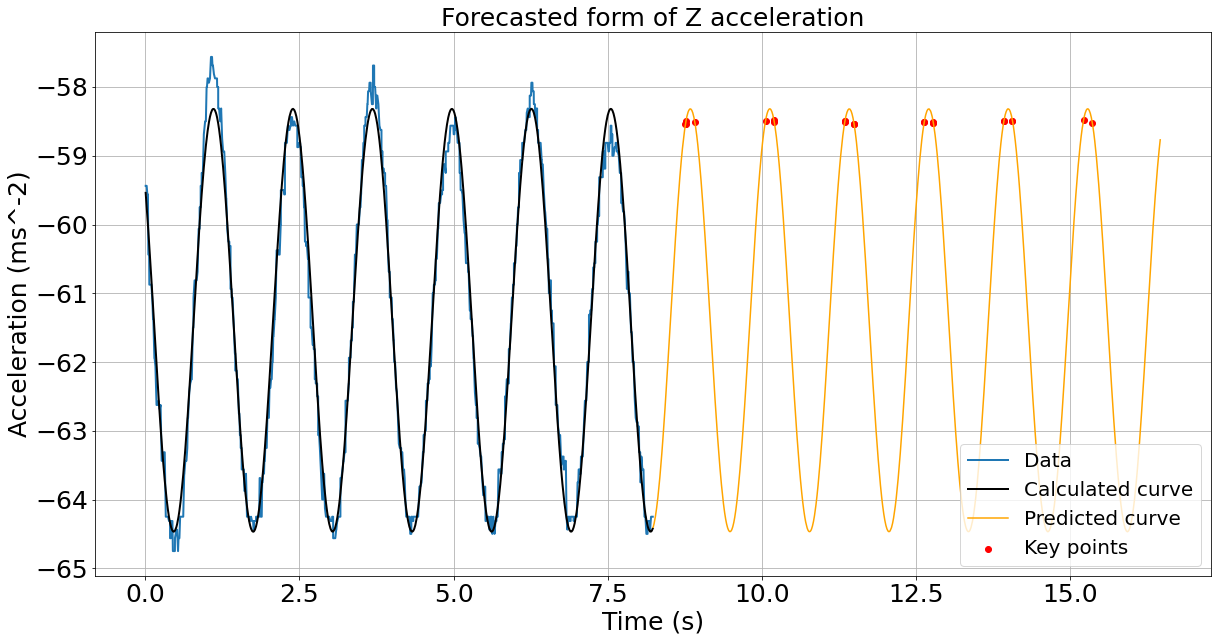

RMS error is 0.26462341598573813


In [4]:
''' TESTING FOR ACCELERATION DATA '''

file_path = r'C:\Users\Ellie\Desktop\third year\Group studies\acc 4 min swing Z.csv'

COLUMNS = [AZ, T] # all column headings in data set

N = 1000 # size of measurement window

p0=[-3.1,4.7,0.1,-61]                #approximate fitting parameters for AZ

Time = column_to_array(file_path, T)[:N]
A = column_to_array(file_path, AZ)[:N]

target = -58.5
error = 0.04

plt.figure(figsize=(20,10))
plt.plot(Time, A, linewidth=2, label='Data')
plot_sin(A, Time, p0)
plot_forecast(A, Time, p0)
target_points(target, error, A, Time, p0)
plt.title('Forecasted form of Z acceleration', fontsize = 25)
plt.xlabel('Time (s)', fontsize=25)
plt.ylabel('Acceleration (ms^-2)', fontsize=25)
plt.grid()
plt.legend(loc='lower right', fontsize=20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.show()

rms = rms_error(A, Time, p0)
print('RMS error is', rms)